Training Accuracy (Modified): 100.0%
Test Accuracy (Modified): 50.0%
Misclassified Indices (Modified): [ 0  2  3  4  5  6  8 10 12 16 18 21 25 28 29 30 31 33 35 37 38]


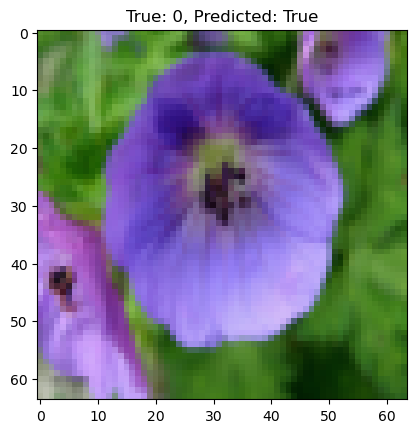

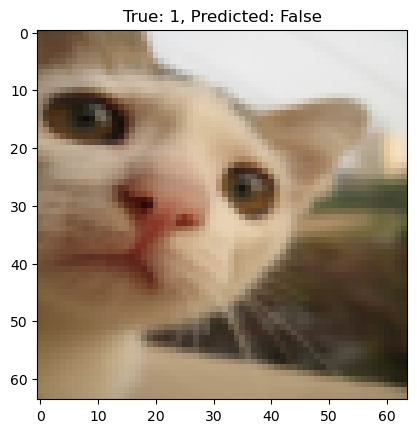

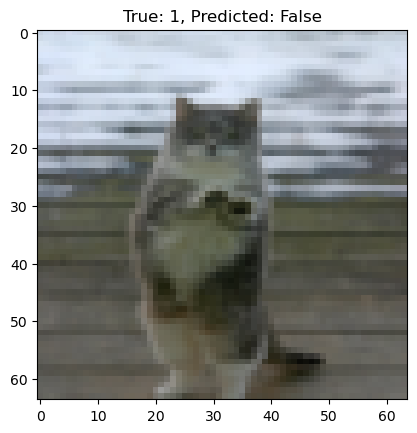

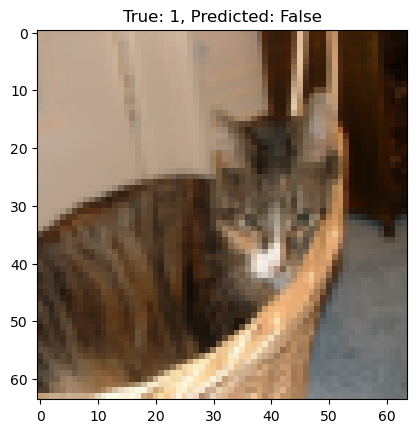

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt  # importing what we need

#here we are doing almost the exact same stuff as part 2 but we are switching the training set 

# Load the dataset
train_data = h5py.File('train_catvnoncat.h5')  # here we are loading our test and train data
test_data = h5py.File('test_catvnoncat.h5')

X_train = np.array(train_data['train_set_x'])  # this part takes out the images in the file to be our x train data
Y_train = np.array(train_data['train_set_y'])  # this takes out the labels from our data which is our y train data
X_test = np.array(test_data['test_set_x'])  # same as above but for our test data
Y_test = np.array(test_data['test_set_y'])  # same for Y test

# Preprocessing
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0  # Flatten, normalize, and transpose train data
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0  # Same for test data
Y_train = Y_train.reshape(1, -1)  # Reshape Y_train into a row vector
Y_test = Y_test.reshape(1, -1)  # Same for Y_test

# Initialize parameters
def init_parm(dim):  # use a function here for better use later on
    w = np.zeros((dim, 1))  # this makes a vector with zeros, rows of dim size and 1 column
    b = 0  # starting bias
    return w, b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # here we make the sigmoid function

# Forward and Backward propagation
def propagate(w, b, X, Y):  # forward/backward propagation
    train_num = X.shape[1]  # number of training samples
    prob = sigmoid(np.dot(w.T, X) + b)  # probabilities using sigmoid
    cost = -1 / train_num * np.sum(Y * np.log(prob) + (1 - Y) * np.log(1 - prob))  # cost function
    dw = 1 / train_num * np.dot(X, (prob - Y).T)  # gradient of weights
    db = 1 / train_num * np.sum(prob - Y)  # gradient of bias
    return dw, db, cost

# Gradient Descent
def grad_desc(w, b, X, Y, num_iterations, learning_rate):  # gradient descent/optimization
    costs = []  # initialize a cost list to store it
    for i in range(num_iterations):  # number of iterations
        dw, db, cost = propagate(w, b, X, Y)  # calculate gradients and cost
        w -= learning_rate * dw  # update weights
        b -= learning_rate * db  # update bias
        costs.append(cost)  # store the cost
    return w, b, costs

# Prediction function
def predict(w, b, X):  # prediction function
    prob = sigmoid(np.dot(w.T, X) + b)  # calculate probabilities
    return (prob > 0.5)  # threshold: return 1 if prob > 0.5, else 0

# Modify the dataset, this is where we change what we are doing now 
student_id_last_digit = 7
new_train_size = 160 + student_id_last_digit

X_train_new = X_train[:, :new_train_size]  # new training data
Y_train_new = Y_train[:, :new_train_size]  # new training labels
X_test_new = X_train[:, new_train_size:]  # new test data
Y_test_new = Y_train[:, new_train_size:]  # new test labels

# Train on modified dataset
dim = X_train.shape[0]  # feature dimension
w, b = init_parm(dim)  # initialize weights and bias
w, b, costs = grad_desc(w, b, X_train_new, Y_train_new, num_iterations=2000, learning_rate=0.005)  # train on modified data

train_predictions_new = predict(w, b, X_train_new)  # predict on modified train set
test_predictions_new = predict(w, b, X_test_new)  # predict on modified test set

train_accuracy_new = 100 - np.mean(np.abs(train_predictions_new - Y_train_new)) * 100  # calculate new train accuracy
test_accuracy_new = 100 - np.mean(np.abs(test_predictions_new - Y_test_new)) * 100  # calculate new test accuracy

print(f"Training Accuracy (Modified): {train_accuracy_new}%")  # print modified train accuracy
print(f"Test Accuracy (Modified): {test_accuracy_new}%")  # print modified test accuracy

misclassified_indices_new = np.where(test_predictions_new != Y_test_new)[1]  # misclassified indices
print(f"Misclassified Indices (Modified): {misclassified_indices_new}")  # print misclassified indices

# Display 4 misclassified images for modified dataset
for i in range(4):  # display first 4 misclassified images
    index = misclassified_indices_new[i]
    plt.imshow(X_test_new[:, index].reshape(64, 64, 3))
    plt.title(f"True: {Y_test_new[0, index]}, Predicted: {test_predictions_new[0, index]}")
    plt.show()
